In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

# Load the data set

In [2]:
data=pd.read_csv(r"D:\Downloads\spotify-2023.csv",encoding="latin1")
data.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  in_apple_charts  \
0                147  141381703                  43              263   
1                 48  133716286                  48              126   
2                113  140003974                  94              207   
3                100  800840817                 116              207   
4                 50  303236322                  84              133   

  in_deezer_playlists  in_deezer_charts in_shazam_charts  bpm key   mode  \
0                  45                10              826  125   B  Major   
1                  58                14              382   92  C#  Major   
2                  91                14              949  138   F  Major   
3                 125                12              548  170   A  Major   
4                  87                15              425  144   A  Minor   

   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
0              80         89        83              31                   0   
1              71         61        74               7                   0   
2              51         32        53              17                   0   
3              55         58        72              11                   0   
4              65         23        80              14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6

In [3]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [4]:
data.shape

(953, 24)

## Steps to follow before coming to the conclusion:

> 1. Understanding the Data

> 2. Data Cleaning and Pre-processing: This step involves handling missing values, removing duplicates, converting data types,   and dealing with outliers.
    Ensure the dataset is in a suitable format for analysis.
    
> 3. Exploratory Data Analysis (EDA): 

     > Univariate Analysis: Examine the distribution of individyal variables using histogram, box plots, etc.
     
     > Bivariate Analysis: Explore relationships between pairs of variables using scatter plots, correlation matrices,
       or pair plots.
       
     > Multivariate Analysis: Investigate relationships between multiple variables simultaneously using techniques like
       heatmaps, 3D scatter plots, etc.
       
> 4. Feature Engineering: Create new features that might be useful for analysis, such as aggregating data over time periods or creating interaction terms between variables.

> 5. Statistical Analyses:

     > Regression Analysis: Use regression models to understand the relationship between song attributes and success metrics. For example, fit a linear regression model to predict song popularity based on attributes like tempo, danceability, and energy.
     
     > Hypothesis Testing: Formulate hypotheses about the popularity of songs across different geographical regions or the impact of certain artist characteristics on song success. Use appropriate statistical tests such as t-tests or ANOVA to test these hypotheses.
     
> 6. Visualization of Statistical Analyses: Visualize the results of statistical analyses using appropriate plots such as regression lines, hypothesis testing results (e.g., p-value distributions), or clusters of data points.

> 7.Documentation and Reporting: Document the entire analysis process, including data preprocessing steps, visualizations, statistical analyses, and conclusions. Prepare a comprehensive report or presentation summarizing the key findings and insights


## Data Understanding

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

> We have dataset having 953 rows and 24 columns, each column tells us some insight about the song which is present in spotify.

### Let's understand what all these columns mean:

1. track_name: Name of the Track
2. artist(s)_name: Name of the artists present in the song
3. artist_count: Number of artists present in the song.
4. released_year: Release Year of the track
5. released_month: Release Month of the track
6. released_day: Released Day of the track
7. in_spotify_playlists: Number of playlist in which the song is included.
8.  in_spotify_charts: performance of a song or artist on Spotify's official charts.
9. streams:  number of times a song has been listened
10. in_apple_playlists: Number of playlist in which the song is included
11. in_apple_charts:performance of a song or artist on Apple's official charts
12. in_deezer_playlists:Number of playlist in which the song is included
13. in_deezer_charts:performance of a song or artist on deezer's's official charts
14. in_shazam_charts:performance of a song or artist on shazam's's official charts
15. bpm:Beats Per Minute
16. key:The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
17. mode:Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
18. danceability_%:Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
19. valence_%: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
20. energy_%:Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
21. acousticness_%: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
22. instrumentalness_%:The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
23. liveness_%: Detects the presence of an audience in the recording
24. speechiness_%: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

## DATA Cleaning

In [6]:
data.shape

(953, 24)

In [7]:
# checking null values
data.isnull().sum()/data.shape[0]

track_name              0.000000
artist(s)_name          0.000000
artist_count            0.000000
released_year           0.000000
released_month          0.000000
released_day            0.000000
in_spotify_playlists    0.000000
in_spotify_charts       0.000000
streams                 0.000000
in_apple_playlists      0.000000
in_apple_charts         0.000000
in_deezer_playlists     0.000000
in_deezer_charts        0.000000
in_shazam_charts        0.052466
bpm                     0.000000
key                     0.099685
mode                    0.000000
danceability_%          0.000000
valence_%               0.000000
energy_%                0.000000
acousticness_%          0.000000
instrumentalness_%      0.000000
liveness_%              0.000000
speechiness_%           0.000000
dtype: float64

In [8]:
data.fillna(0, inplace=True)

In [9]:
data.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

## Feature Engineering

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

In [11]:
# Convert non-numeric values to NaN
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data.dropna(subset=['streams'], inplace=True)

In [12]:
# Convert non-numeric values to NaN
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
data.dropna(subset=['in_deezer_playlists'], inplace=True)

In [13]:
# Convert non-numeric values to NaN
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')
data.dropna(subset=['in_shazam_charts'], inplace=True)

In [14]:

# Mapping dictionary for alphanumeric keys to numeric values
key_mapping = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}

# Convert alphanumeric keys to numeric values
data['key'] = data['key'].map(key_mapping)

In [15]:
data['mode'].value_counts()

mode
Major    493
Minor    374
Name: count, dtype: int64

In [16]:
key_map={'Major':1.0,'Minor':0.0}
# Convert alphanumeric keys to numeric values
data['mode'] = data['mode'].map(key_map)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 867 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            867 non-null    object 
 1   artist(s)_name        867 non-null    object 
 2   artist_count          867 non-null    int64  
 3   released_year         867 non-null    int64  
 4   released_month        867 non-null    int64  
 5   released_day          867 non-null    int64  
 6   in_spotify_playlists  867 non-null    int64  
 7   in_spotify_charts     867 non-null    int64  
 8   streams               867 non-null    float64
 9   in_apple_playlists    867 non-null    int64  
 10  in_apple_charts       867 non-null    int64  
 11  in_deezer_playlists   867 non-null    float64
 12  in_deezer_charts      867 non-null    int64  
 13  in_shazam_charts      867 non-null    float64
 14  bpm                   867 non-null    int64  
 15  key                   779 no

In [18]:
# change all the int to float
# Select only the integer columns
integer_columns = data.select_dtypes(include='int64').columns

# Convert selected integer columns to float
data[integer_columns] = data[integer_columns].astype(float)

## checking duplicates rows

In [19]:
data[data.duplicated()]

# we don't have any duplicate rows.

Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%]
Index: []

## EDA

In [20]:
# Description of the Data
data.describe()

artist_count  released_year  released_month  released_day  \
count    867.000000     867.000000      867.000000    867.000000   
mean       1.574394    2019.223760        6.152249     14.147636   
std        0.913051      10.570264        3.508798      9.005073   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2021.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            867.000000         867.000000  8.670000e+02   
mean            3371.915802          10.807382  4.058458e+08   
std             4042.566785          18.111052  4.093741e+08   
min               31.000000           0.000000  2.762000e+03   
25%              817.500000           0.000000  1.352617e+08   
50%             1930.000000           2.000000  2.587147e+08   
75%             4280.500000          15.000000  5.314238e+08   
max            29499.000000         147.000000  2.808097e+09   

       in_apple_playlists  in_apple_charts  in_deezer_playlists  \
count           867.00000       867.000000           867.000000   
mean             54.33218        48.294118           109.200692   
std              64.91117        48.666704           178.159888   
min               0.00000         0.000000             0.000000   
25%              12.00000         6.000000            12.000000   
50%              29.00000        32.000000            36.000000   
75%              72.00000        81.000000           110.000000   
max             492.00000       275.000000           974.000000   

       in_deezer_charts  in_shazam_charts         bpm         key        mode  \
count        867.000000        867.000000  867.000000  779.000000  867.000000   
mean           2.463668         46.572088  123.061130    5.934531    0.568627   
std            5.643325        120.090364   28.194265    3.232559    0.495554   
min            0.000000          0.000000   65.000000    1.000000    0.000000   
25%            0.000000          0.000000  100.000000    3.000000    0.000000   
50%            0.000000          1.000000  121.000000    6.000000    1.000000   
75%            2.000000         30.000000  142.000000    9.000000    1.000000   
max           46.000000        953.000000  206.000000   11.000000    1.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count      867.000000  867.000000  867.000000      867.000000   
mean        67.261822   51.508651   64.131488       27.366782   
std         14.452341   23.462138   16.385970       25.695574   
min         23.000000    4.000000   14.000000        0.000000   
25%         58.000000   32.000000   53.000000        6.000000   
50%         70.000000   52.000000   65.000000       18.000000   
75%         78.000000   70.000000   76.500000       43.000000   
max         96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          867.000000  867.000000     867.000000  
mean             1.606690   18.366782      10.326413  
std              8.523902   13.915838      10.051750  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   24.000000      12.000000  
max             91.000000   97.000000      64.000000

In [21]:
# top 10 highest streamed song
top_streams=data.sort_values('streams',ascending=False).head(10)
top_streams[['track_name','streams']]

track_name       streams
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09
84                       STAY (with Justin Bieber)  2.665344e+09
71                                      Heat Waves  2.557976e+09
14                                       As It Was  2.513188e+09
621                                   Lucid Dreams  2.288695e+09
187                                        Circles  2.132336e+09
513                                       good 4 u  1.887040e+09
535                                drivers license  1.858144e+09
410              INDUSTRY BABY (feat. Jack Harlow)  1.814350e+09
433                      Levitating (feat. DaBaby)  1.802514e+09

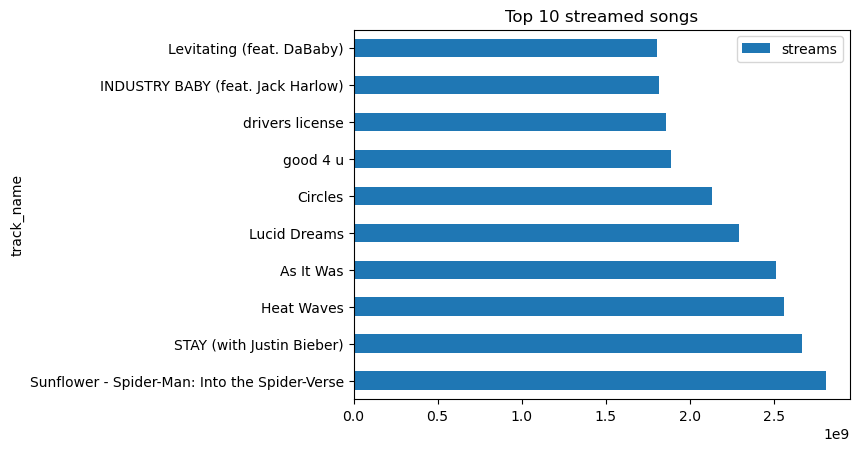

In [22]:
top_streams[['track_name','streams']].plot(kind='barh',x='track_name',y='streams')
plt.title("Top 10 streamed songs")
plt.show()

In [23]:
# top 10 highest presence in_spotify_playlists
sorted_spotify_playlist=data.sort_values('in_spotify_playlists',ascending=False).head(10)
sorted_spotify_playlist[['track_name','in_spotify_playlists']]

track_name  in_spotify_playlists
657                                           Lost               29499.0
110                                    Money Trees               26792.0
41   Sunflower - Spider-Man: Into the Spider-Verse               24094.0
14                                       As It Was               23575.0
71                                      Heat Waves               22543.0
166        Every Breath You Take - Remastered 2003               22439.0
424         Running Up That Hill (A Deal With God)               21811.0
186                                   Pink + White               21574.0
115                                 No Role Modelz               21164.0
902                                        Bound 2               19806.0

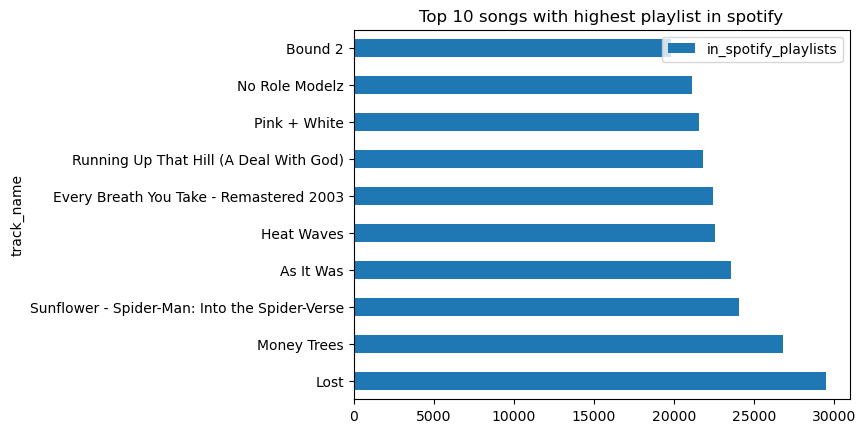

In [24]:
# visualtion of Top 10 songs with highest playlist in spotify
sorted_spotify_playlist[['track_name','in_spotify_playlists']].plot(kind='barh',x='track_name',y='in_spotify_playlists')
plt.title('Top 10 songs with highest playlist in spotify')
plt.show()

In [25]:
# top 10 highest in_apple_playlists
sorted_apple_playlist=data.sort_values('in_apple_playlists',ascending=False).head(10)
sorted_apple_playlist=sorted_apple_playlist[['track_name','in_apple_playlists']]
sorted_apple_playlist

track_name  in_apple_playlists
84                       STAY (with Justin Bieber)               492.0
14                                       As It Was               403.0
187                                        Circles               391.0
71                                      Heat Waves               386.0
516                       Kiss Me More (feat. SZA)               382.0
41   Sunflower - Spider-Man: Into the Spider-Verse               372.0
429                                     Bad Habits               344.0
410              INDUSTRY BABY (feat. Jack Harlow)               300.0
42                                 I'm Good (Blue)               291.0
519                 MONTERO (Call Me By Your Name)               275.0

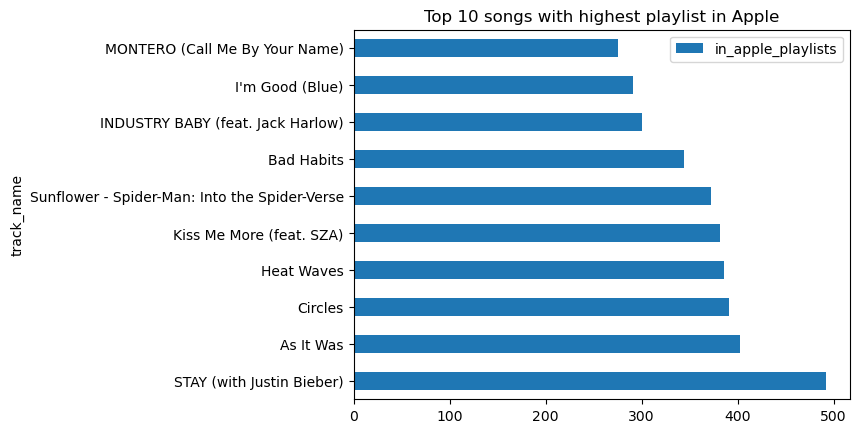

In [26]:
# visualtion of Top 10 songs with highest playlist in Apple
sorted_apple_playlist.plot(kind='barh',x='track_name',y='in_apple_playlists')
plt.title('Top 10 songs with highest playlist in Apple')
plt.show()

In [27]:
# Top 10 artists with most songs in the dataset
top_artists = data['artist(s)_name'].value_counts().head(10)
top_artists


artist(s)_name
Taylor Swift        33
The Weeknd          20
Bad Bunny           19
SZA                 19
Harry Styles        16
Morgan Wallen       11
Kendrick Lamar      11
Feid                 8
Drake, 21 Savage     8
BTS                  8
Name: count, dtype: int64

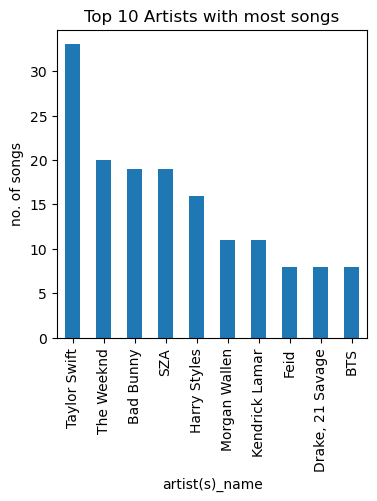

In [28]:
# visualization of top 10 artist
plt.figure(figsize=(4,4))
top_artists.plot(kind='bar')
plt.title("Top 10 Artists with most songs")
plt.ylabel('no. of songs')
plt.show()


Text(0, 0.5, 'No. of Songs')

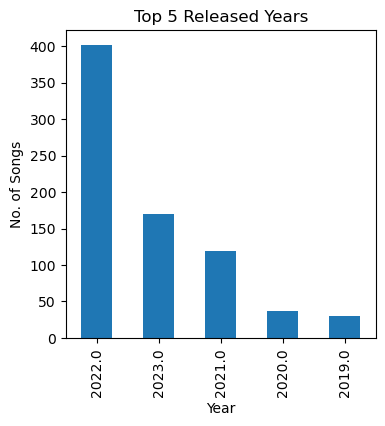

In [29]:
# top 5 year when most song released
plt.figure(figsize=(4, 4))
data['released_year'].value_counts().head().plot(kind='bar')
plt.title('Top 5 Released Years')
plt.xlabel('Year')
plt.ylabel('No. of Songs')

In [30]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

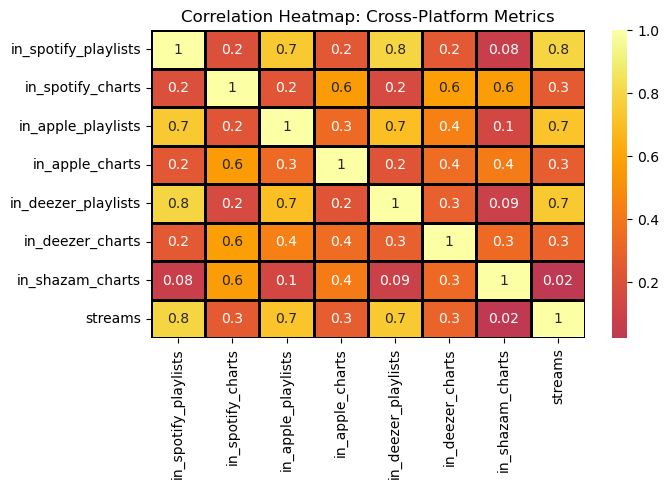

In [31]:
# Select columns for audio features
playlist_charts_colums =['in_spotify_playlists','in_spotify_charts','in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts','streams']
# Calculate the correlation matrix
correlation_matrix = data[playlist_charts_colums].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True,fmt="0.1g",cmap='inferno', center=0,linewidths=1,linecolor="Black")
plt.title('Correlation Heatmap: Cross-Platform Metrics')
plt.show()

## Let's discuss about the column affecting success of song

> It can be danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, and speechiness_%

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>danceability_%', '<i>energy_%','<i>instrumentalness_%', '<i>speechiness_%','<i>acousticness_%','<i>liveness_%' , '<i>valence_%' ))
fig.add_trace(go.Histogram(x=data['danceability_%'],name='danceability_%'),row=1,col=1)
fig.add_trace(go.Histogram(x=data['energy_%'],name='energy_%'),row=1,col=2)
fig.add_trace(go.Histogram(x=data['instrumentalness_%'],name='instrumentalness_%'),row=1,col=3)
fig.add_trace(go.Histogram(x=data['speechiness_%'],name='speechiness_%'),row=2,col=1)
fig.add_trace(go.Histogram(x=data['acousticness_%'],name='acousticness_%'),row=2,col=2)
fig.add_trace(go.Histogram(x=data['liveness_%'],name='liveness_%'),row=2,col=3)
fig.add_trace(go.Histogram(x=data['valence_%'],name='valence_%'),row=3,col=1)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

> Out of these 7 variables, danceability_%, valence_% and energy_% is a bell curve distribution, which suggest it might contributes
  in the success of the song. However to understand how these factors might contribute to the success of a song, we would typically conduct further analysis, such as regression analysis,
    to explore the relationships between these variables and your success metric

## Applying regression plot to understand what song attribute significantly contributes to a song’s success


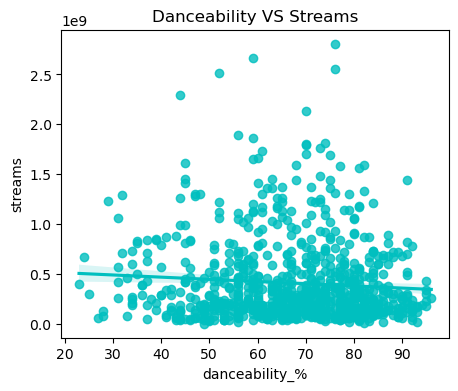

In [35]:
plt.figure(figsize=(5,4))
sns.regplot(data=data,x='danceability_%',y='streams',color='c').set(title='Danceability VS Streams')
plt.show()

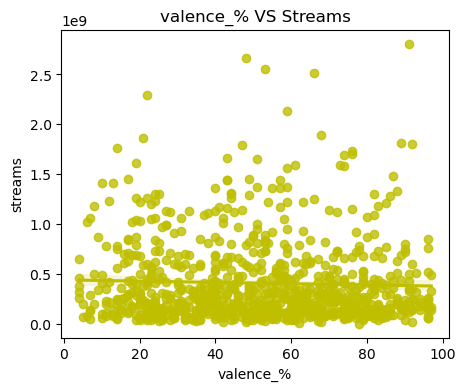

In [36]:
plt.figure(figsize=(5,4))
sns.regplot(data=data,x='valence_%',y='streams',color='y').set(title='valence_% VS Streams')
plt.show()

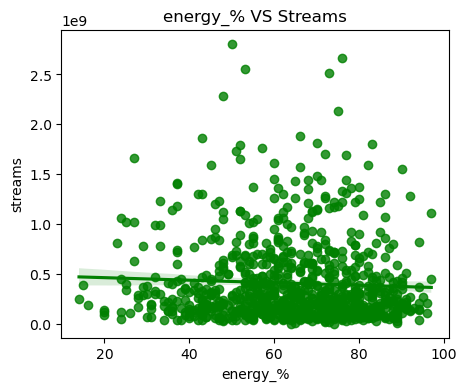

In [37]:
plt.figure(figsize=(5,4))
sns.regplot(data=data,x='energy_%',y='streams',color='g').set(title='energy_% VS Streams')
plt.show()

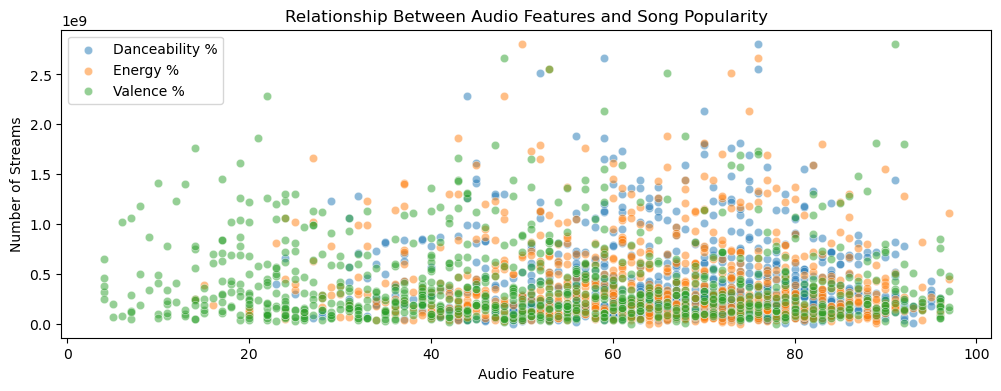

In [38]:
# Select columns for audio features and popularity
audio_features_columns = ['danceability_%', 'energy_%', 'valence_%']
popularity_column = 'streams'

# Create scatter plots
plt.figure(figsize=(12, 4))
for feature in audio_features_columns:
    sns.scatterplot(data=data, x=feature, y=popularity_column, alpha=0.5, label=feature.replace('_', ' ').title())

plt.xlabel('Audio Feature')
plt.ylabel('Number of Streams')
plt.title('Relationship Between Audio Features and Song Popularity')
plt.legend()
plt.show()

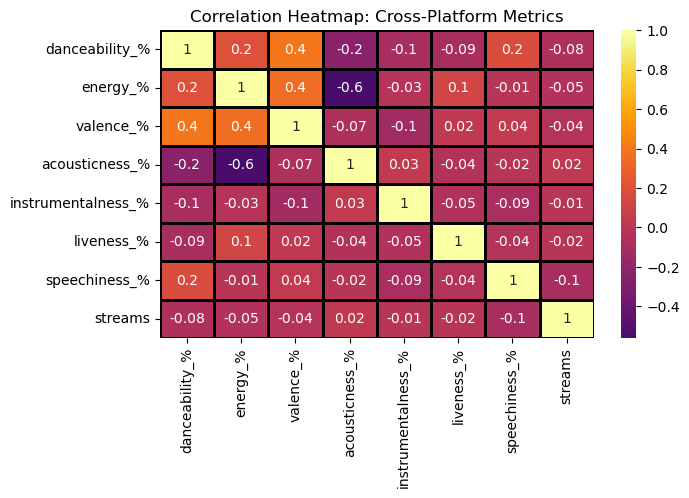

In [39]:
# Select columns for audio features
success__metrics_colums = ['danceability_%', 'energy_%', 'valence_%','acousticness_%', 'instrumentalness_%', 'liveness_%',  'speechiness_%','streams']

# Calculate the correlation matrix
correlation_matrix = data[success__metrics_colums].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True,fmt="0.1g",cmap='inferno', center=0,linewidths=1,linecolor="Black")
plt.title('Correlation Heatmap: Cross-Platform Metrics')
plt.show()

In [40]:
correlation_matrix

danceability_%  energy_%  valence_%  acousticness_%  \
danceability_%            1.000000  0.198199   0.391262       -0.243282   
energy_%                  0.198199  1.000000   0.352440       -0.561368   
valence_%                 0.391262  0.352440   1.000000       -0.069434   
acousticness_%           -0.243282 -0.561368  -0.069434        1.000000   
instrumentalness_%       -0.097155 -0.029665  -0.133342        0.030552   
liveness_%               -0.093021  0.117265   0.020305       -0.037440   
speechiness_%             0.170231 -0.014843   0.039391       -0.024079   
streams                  -0.077499 -0.050898  -0.036406        0.018812   

                    instrumentalness_%  liveness_%  speechiness_%   streams  
danceability_%               -0.097155   -0.093021       0.170231 -0.077499  
energy_%                     -0.029665    0.117265      -0.014843 -0.050898  
valence_%                    -0.133342    0.020305       0.039391 -0.036406  
acousticness_%                0.030552   -0.037440      -0.024079  0.018812  
instrumentalness_%            1.000000   -0.049872      -0.085388 -0.013320  
liveness_%                   -0.049872    1.000000      -0.035529 -0.022129  
speechiness_%                -0.085388   -0.035529       1.000000 -0.095301  
streams                      -0.013320   -0.022129      -0.095301  1.000000

## Conclusion


Based on the correlation matrix provided:

> Danceability: There is a moderate positive correlation (0.39) between danceability and valence, suggesting that songs with higher danceability tend to have higher valence, indicating a more positive emotional tone.
    
> Energy: Energy has a moderate negative correlation (-0.55) with acousticness, indicating that songs with higher energy levels tend to have lower acousticness, meaning they are less likely to be acoustic.
    
> Valence: Valence has a weak positive correlation (0.19) with danceability and energy, suggesting that songs with higher valence tend to be more danceable and energetic.
    
> Acousticness: Acousticness has a moderate negative correlation (-0.55) with energy, indicating that songs with higher acousticness tend to have lower energy levels.
    
> Instrumentalness: There is no strong correlation with any other variable, indicating that instrumentalness does not have a significant linear relationship with the other variables in the dataset.
    
> Liveness: Liveness does not show strong correlations with other variables, suggesting that its influence on other factors such as danceability or energy may be minimal.
    
> Speechiness: Speechiness has a weak negative correlation (-0.09) with streams, suggesting that songs with higher speechiness (more spoken words) tend to have fewer streams.
    


In conclusion, danceability, energy and valence seem to have the most significant correlations among the variables examined.
This suggests that these factors might play important roles in determining the success of a song, as measured by the number of streams.
However, it's important to note that correlation does not imply causation, and further analysis would be needed to establish any causal relationships. 
Additionally, factors not included in this analysis could also contribute to the success of a song.